## SQL + Python Sales Data Analysis

In [62]:
# Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#  Connect to SQLite database 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [64]:
#  Create sales table 
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [65]:
#  Insert sample sales data
sample_data = [
    ('Laptop', 5, 700),
    ('Laptop', 3, 750),
    ('Mouse', 10, 20),
    ('Keyboard', 6, 35),
    ('Monitor', 4, 200),
    ('Monitor', 2, 180)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [66]:
#  SQL query to calculate total quantity & revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [67]:
#  Load query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

In [68]:
#  Display results in console
print(" Sales Summary:")
print(df)

 Sales Summary:
    product  total_qty  revenue
0  Keyboard         42   1470.0
1    Laptop         56  40250.0
2   Monitor         42   8120.0
3     Mouse         70   1400.0


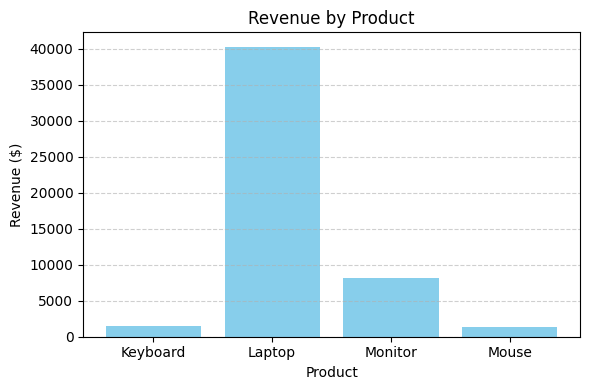

In [69]:
#  Plot a simple bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(df['product'], df['revenue'], color='skyblue')
ax.set_title("Revenue by Product")
ax.set_xlabel("Product")
ax.set_ylabel("Revenue ($)")
ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.tight_layout()


In [70]:
#  Save and show the chart
fig.savefig("sales_chart.png")
plt.show() 

In [71]:
#  Close database connection
conn.close()